_____________________________________________________________________________________________________________________________________________________________________________________________

Анализ данных

<Axes: >

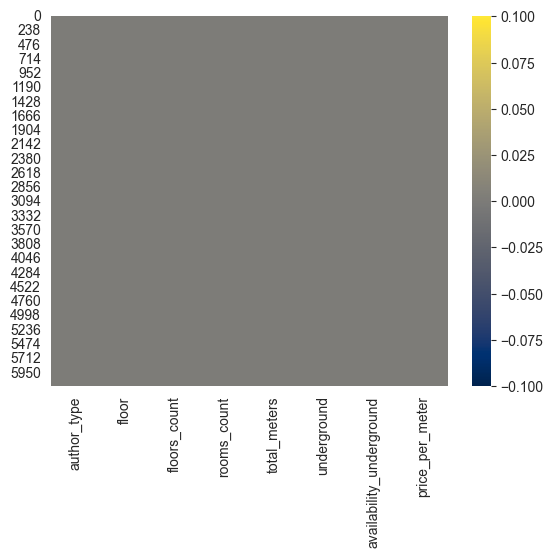

In [61]:
import pandas as pd
import seaborn as sns

path_base = "base.csv"
# path_base = 'result.csv'

df = pd.read_csv(path_base)
sns.heatmap(df.isnull(),cmap='cividis')

________________________________________________________________________________________________________________________________________________________________________________________________________

Поиск выбросов

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path_base = "base.csv"

df = pd.read_csv(path_base)

# Вычисление границ IQR
Q1, Q3 = df['price_per_meter'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  

# Отсеивание выбросов
df_cleaned = df[(df['price_per_meter'] >= lower_bound) & (df['price_per_meter'] <= upper_bound)]

df_cleaned.to_csv( path_base, index=False, encoding='utf-8-sig')


__________________________________________________________________________________________________________________________________________________________________________________________________



<Axes: ylabel='Frequency'>

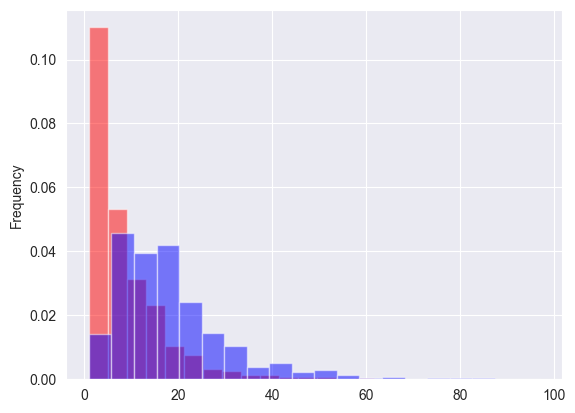

In [62]:
import pandas as pd

path_base = "base.csv"

df = pd.read_csv(path_base)
df.describe()


df.floor.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='r')
df.floors_count.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5, color='b')

In [ ]:
import pandas as pd

path_base = "base.csv"
df = pd.read_csv(path_base)

df['author_type'].value_counts()

author_type
real_estate_agent           2993
developer                   2635
realtor                      294
homeowner                    127
representative_developer      67
unknown                       38
official_representative       14
Name: count, dtype: int64

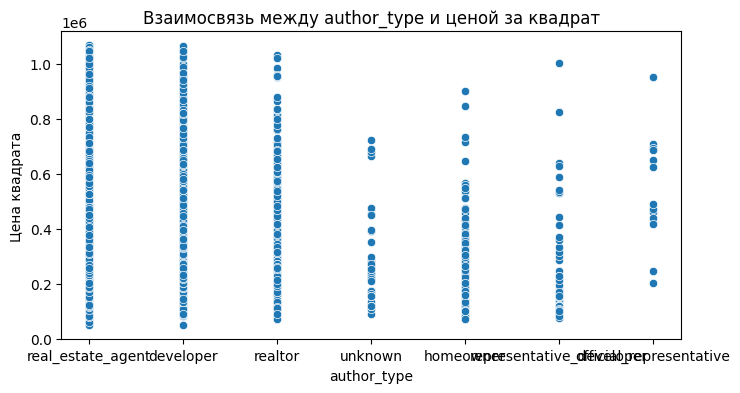

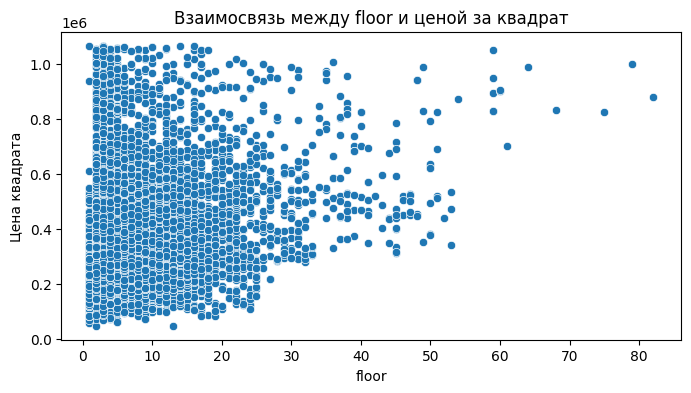

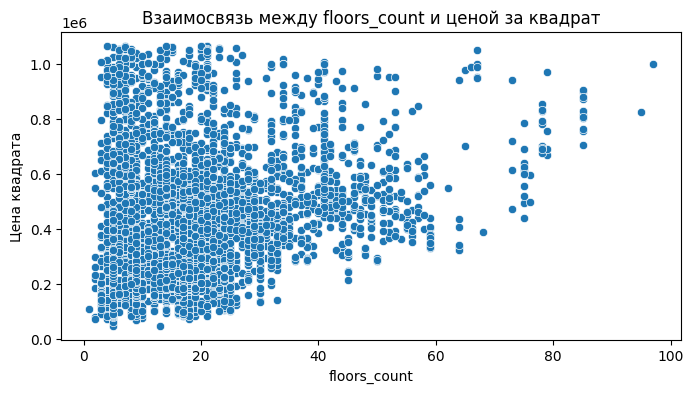

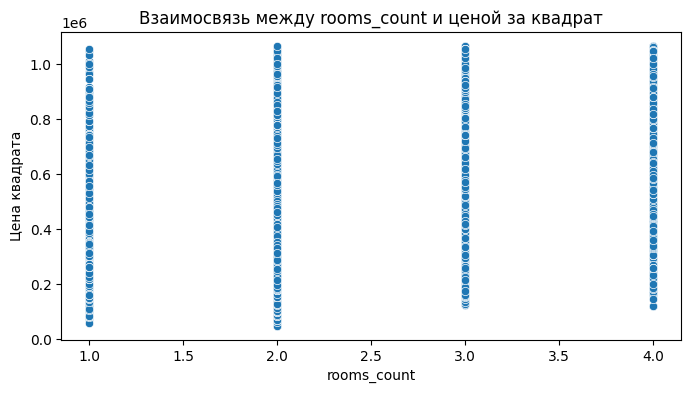

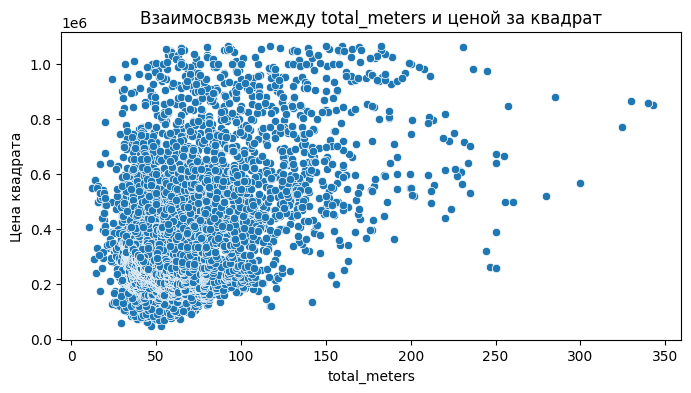

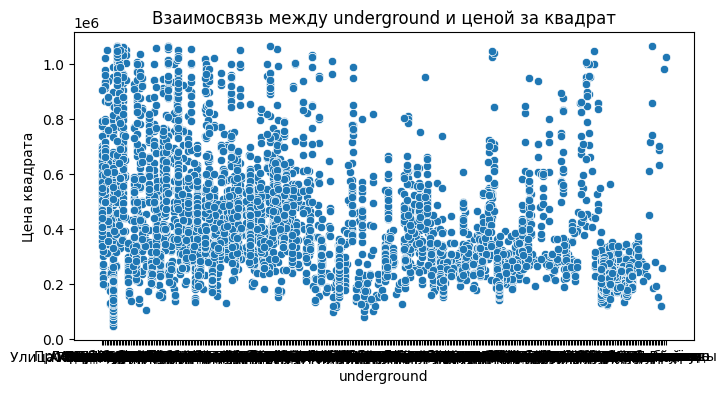

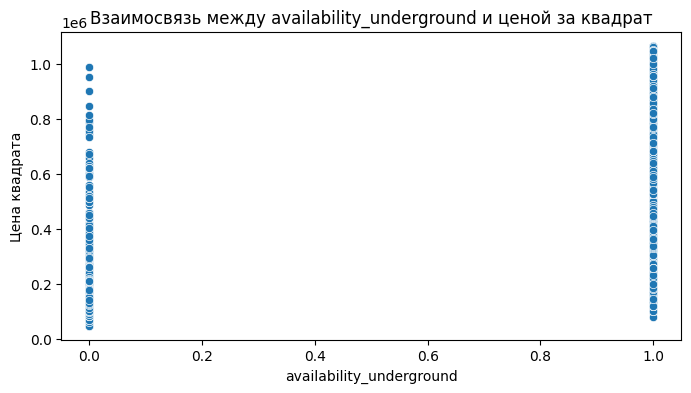

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path_base = "base.csv"
df = pd.read_csv(path_base)

columns_to_plot = ['author_type','floor','floors_count','rooms_count','total_meters','underground','availability_underground']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=column, y='price_per_meter')
    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.ylabel('Цена квадрата')
    plt.show()

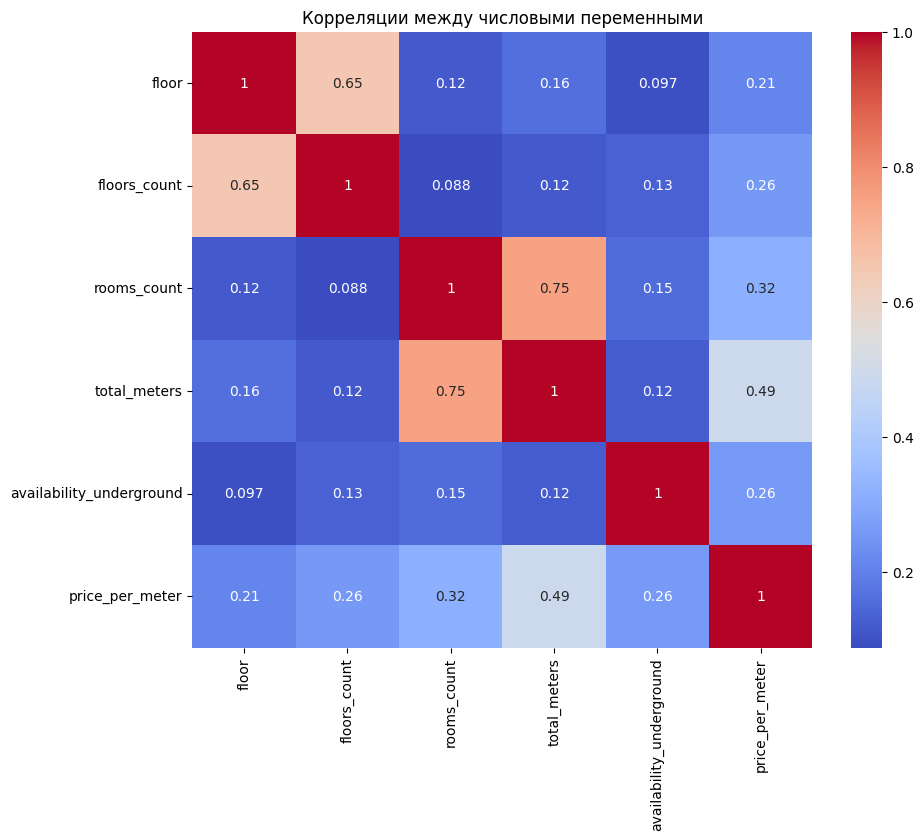

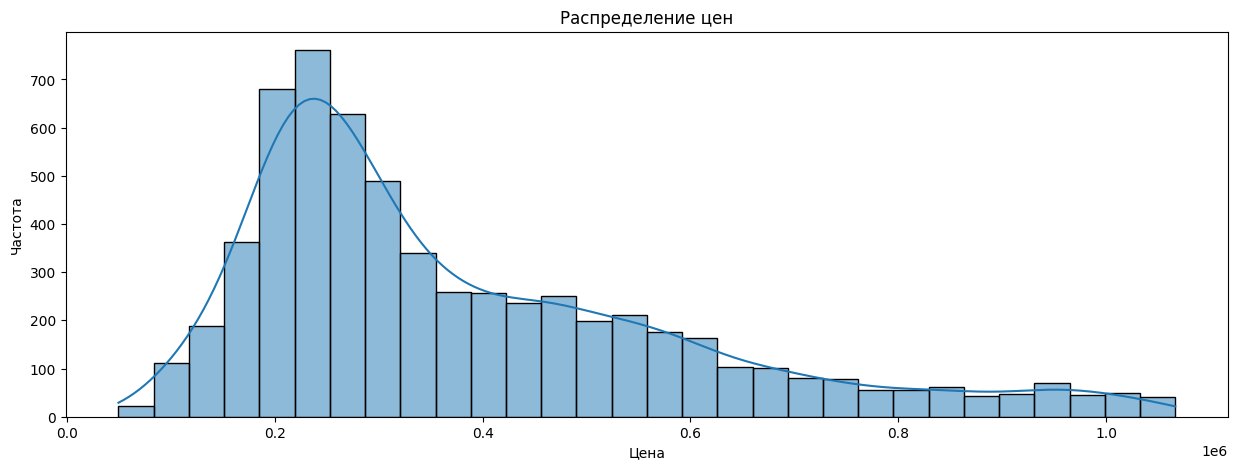

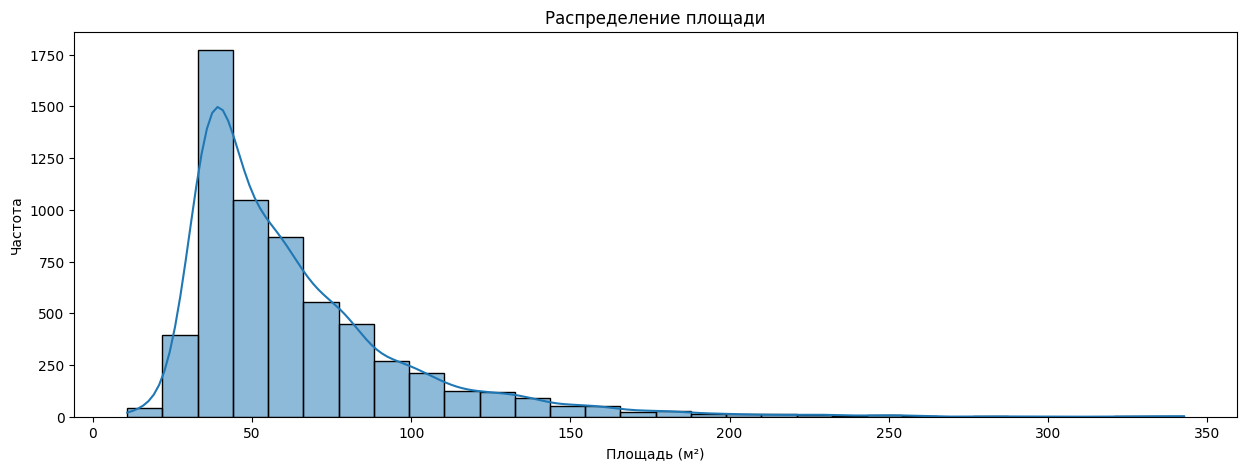

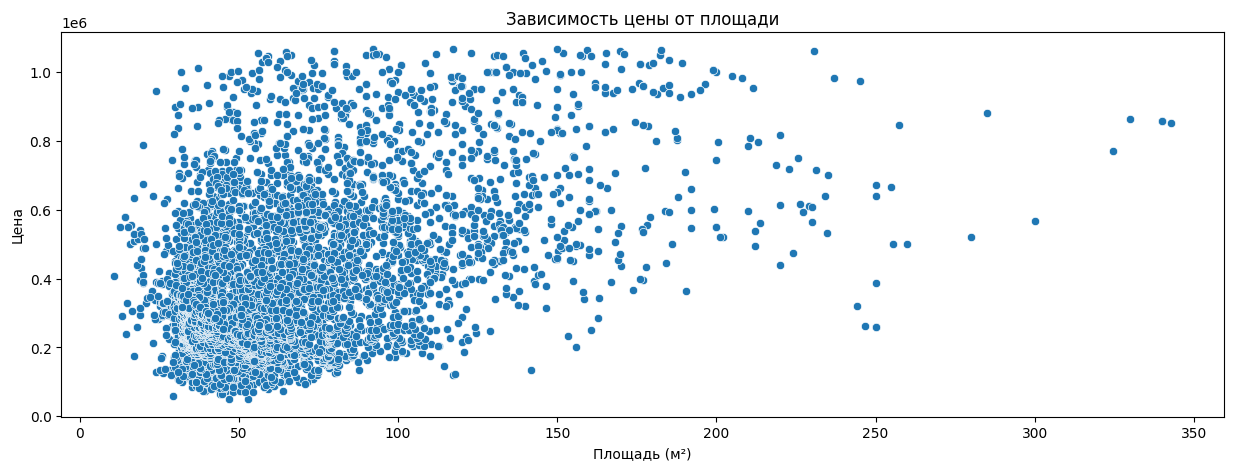

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

############################################################################################################

path_base = "base.csv"
df = pd.read_csv(path_base)

############################################################################################################

numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()  

############################################################################################################

plt.figure(figsize=(15, 5))
sns.histplot(df['price_per_meter'], bins=30, kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

############################################################################################################

plt.figure(figsize=(15, 5))
sns.histplot(df['total_meters'], bins=30, kde=True)
plt.title('Распределение площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Частота')
plt.show()

############################################################################################################

plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='total_meters', y='price_per_meter')
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена')
plt.show()